# Reading and writing FITS files

The [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) sub-package provides a way to read, write, and manipulate FITS files. It is one of the oldest packages in Astropy, and started out as the separate PyFITS package.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Read image FITS files and access data and header</li>
<li>Read tabular FITS files and access data and header</li>
<li>Construct new FITS files from scratch</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.io.fits. For more information about the features presented below as well as other available features, you can read the
[astropy.io.fits documentation](https://docs.astropy.org/en/stable/io/fits/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Data

For this tutorial we will be using the ``LMCDensFits1k.fits`` FITS file which was downloaded from http://www.sim.ul.pt/gaia/dr1/gallery/. This file contains the density of sources in the Gaia DR1 release towards the Large Magellanic Cloud (LMC). In addition, we will use the ``gaia_lmc_psc.fits`` file which contains the result of a table query in the GAIA archive.

## Reading FITS files and accessing data

To open a FITS file, use the ``fits.open`` function:

In [2]:
from astropy.io import fits

In [3]:
hdulist = fits.open('data/LMCDensFits1k.fits')
hdulist

The returned object, ``hdulist``, behaves like a Python list, and each element maps to a Header-Data Unit (HDU) in the FITS file. You can view more information about the FITS file with:

In [4]:
hdulist.info()

Filename: data/LMCDensFits1k.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (1000, 750)   float64   


As we can see, this file contains only one HDU. Accessing this HDU can then either be done by index:

In [5]:
hdu = hdulist[0]

or by name:

In [6]:
hdu = hdulist['PRIMARY']

The ``hdu`` object then has two important attributes: ``data``, which behaves like a Numpy array, can be used to access the data, and ``header``, which behaves like a dictionary, can be used to access the header information. First, we can take a look at the data:

In [7]:
hdu.data

array([[1., 0., 1., ..., 0., 1., 0.],
       [2., 0., 1., ..., 2., 1., 2.],
       [2., 0., 1., ..., 3., 1., 5.],
       ...,
       [0., 6., 5., ..., 2., 3., 5.],
       [3., 3., 3., ..., 2., 2., 0.],
       [3., 2., 2., ..., 2., 2., 2.]])

In [8]:
hdu.data.shape

(750, 1000)

This tells us that it is a 2-d image. We can now take a peak at the header:

In [9]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1000                                                  
NAXIS2  =                  750                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'GLON-SIN'                                                            
CRPIX1  =                  500                                                  
CRVAL1  =           280.319239                                                  
CDELT1  =               -0.014                                                  
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'GLAT-SIN'                                                            
CRPIX2  =                  3

which shows that this is an Orthographic (``-SIN``) projection in Galactic Coordinates. We can access individual
header keywords using standard item notation:

In [10]:
hdu.header['CRPIX1']

500

We can now take a look at the data using Matplotlib:

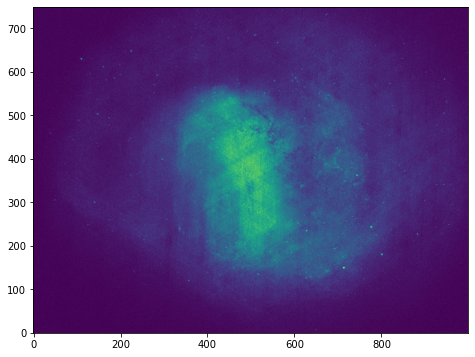

In [11]:
plt.imshow(hdu.data, vmax=150);

Note that this is just a plot of an array, so the coordinates are just pixel coordinates at this stage.

Modifying data or header information in a FITS file object is easy. For example we can add new keywords with:

In [12]:
hdu.header['TELESCOPE'] = 'gaia'

In [15]:
hdu.header['TELESCOP'] = 'Gaia'

In [16]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1000                                                  
NAXIS2  =                  750                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'GLON-SIN'                                                            
CRPIX1  =                  500                                                  
CRVAL1  =           280.319239                                                  
CDELT1  =               -0.014                                                  
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'GLAT-SIN'                                                            
CRPIX2  =                  3

We can also modify the data by extracting a subset for example:

In [17]:
hdu.data = hdu.data[100:-100, 100:-100]
hdu.data.shape

(550, 800)

In [18]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  800                                                  
NAXIS2  =                  550                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'GLON-SIN'                                                            
CRPIX1  =                  500                                                  
CRVAL1  =           280.319239                                                  
CDELT1  =               -0.014                                                  
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'GLAT-SIN'                                                            
CRPIX2  =                  3

and updating the CRPIX values accordingly in the header:

In [19]:
hdu.header['CRPIX1'] -= 100
hdu.header['CRPIX2'] -= 100

In [20]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  800                                                  
NAXIS2  =                  550                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'GLON-SIN'                                                            
CRPIX1  =                  400                                                  
CRVAL1  =           280.319239                                                  
CDELT1  =               -0.014                                                  
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'GLAT-SIN'                                                            
CRPIX2  =                  2

We can now write out the HDU list back to disk:

In [21]:
hdulist.writeto('LMCDensFits1k_cropped.fits', overwrite=True)

or if you were dealing with a multi-HDU file and wanted to just output the HDU you were editing:

In [22]:
hdu.writeto('LMCDensFits1k_cropped.fits', overwrite=True)

## Creating a FITS file from scratch

If you want to create a FITS file from scratch, you need to start off by creating an HDU object:

In [23]:
hdu = fits.PrimaryHDU()

In [26]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

and you can then populate the data and header attributes with whatever information you like, for example random data:

In [27]:
import numpy as np
hdu.data = np.random.random((128, 128))

Note that setting the data automatically populates the header with basic information:

In [28]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  128                                                  
NAXIS2  =                  128                                                  
EXTEND  =                    T                                                  

and you should never have to set header keywords such as ``NAXIS``, ``NAXIS1``, and so on manually. We can then set additional header keywords:

In [29]:
hdu.header['TELESCOP'] = 'Numpy'

and we can then write out the FITS file to disk:

In [30]:
hdu.writeto('random_numpy.fits')

## Convenience functions

In cases where you just want to access the data or header in a specific HDU, you can use the following convenience functions:

In [33]:
data = fits.getdata('data/LMCDensFits1k.fits')
data

array([[1., 0., 1., ..., 0., 1., 0.],
       [2., 0., 1., ..., 2., 1., 2.],
       [2., 0., 1., ..., 3., 1., 5.],
       ...,
       [0., 6., 5., ..., 2., 3., 5.],
       [3., 3., 3., ..., 2., 2., 0.],
       [3., 2., 2., ..., 2., 2., 2.]])

In [34]:
header = fits.getheader('data/LMCDensFits1k.fits')
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1000                                                  
NAXIS2  =                  750                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'GLON-SIN'                                                            
CRPIX1  =                  500                                                  
CRVAL1  =           280.319239                                                  
CDELT1  =               -0.014                                                  
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'GLAT-SIN'                                                            
CRPIX2  =                  3

You can optionally specify the index or name of the HDU to look at (which is important if you are dealing with a multi-HDU file):

In [37]:
data = fits.getdata('data/LMCDensFits1k.fits', extension='PRIMARY')
data

array([[1., 0., 1., ..., 0., 1., 0.],
       [2., 0., 1., ..., 2., 1., 2.],
       [2., 0., 1., ..., 3., 1., 5.],
       ...,
       [0., 6., 5., ..., 2., 3., 5.],
       [3., 3., 3., ..., 2., 2., 0.],
       [3., 2., 2., ..., 2., 2., 2.]])

and similarly for ``getheader``.

In [38]:
header = fits.getheader('data/LMCDensFits1k.fits', extention=0)
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1000                                                  
NAXIS2  =                  750                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'GLON-SIN'                                                            
CRPIX1  =                  500                                                  
CRVAL1  =           280.319239                                                  
CDELT1  =               -0.014                                                  
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'GLAT-SIN'                                                            
CRPIX2  =                  3

## Accessing Tabular Data

Let's now take a look at a tabular dataset - this is a subset of sources from the GAIA DR1 release around the LMC, and only includes the brightest sources in Gmag:

In [41]:
hdulist_psc = fits.open('data/gaia_lmc_psc.fits')

In [42]:
hdulist_psc.info()

Filename: data/gaia_lmc_psc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU     39   1226R x 14C   [K, D, D, D, D, D, D, E, E, D, D, 13A, E, E]   


Here we have two HDUs - the first one is mostly empty and the second contains the table (the primary HDU can't contain a table in general).

Tabular data behaves very similarly to image data such as that shown above, but the data array is a structured Numpy array:

In [48]:
hdulist_psc[0].header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No image, just extensions                      
EXTEND  =                    T / There are standard extensions                  
COMMENT Dummy header; see following table extension                             

In [49]:
hdulist_psc[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  101 / width of table in bytes                        
NAXIS2  =                 1226 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   14 / number of columns                              
TTYPE1  = 'source_id'          / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TTYPE2  = 'ra      '           / label for column 2                             
TFORM2  = 'D       '           / format for column 2                            
TTYPE3  = 'ra_error'        

In [52]:
hdulist_psc[1].data
hdudata = hdulist_psc[1].data
hdudata

FITS_rec([(4650802592000604416, 87.07819921, 0.02117729, -71.97584626, 0.02311897, 1.95153003, 0.02212932,  9.447254 , 1.3508034,  60.90398378, 0.27926544, 'NOT_AVAILABLE', 4558.4004, 0.292 ),
          (4654524816824470144, 74.41054299, 0.02304363, -71.69279845, 0.02351021, 0.95321886, 0.02339412, 10.067117 , 1.5253868, -14.48511978, 0.22425351, 'NOT_AVAILABLE', 4297.3867, 0.2825),
          (4654529695907256832, 74.20814124, 0.07882567, -71.61632605, 0.05787066, 2.39019538, 0.05452098,  9.930226 , 1.3181801,  46.38448485, 2.49083089, 'NOT_AVAILABLE', 4637.565 ,    nan),
          ...,
          (4655429336950537344, 72.34317803, 0.08263071, -69.19133991, 0.17711657, 2.25343773, 0.11207891, 10.428025 , 0.7687664,  30.09822464, 2.99086453, 'NOT_AVAILABLE', 5951.    ,    nan),
          (4655428065639154176, 71.9182134 , 0.01857123, -69.13579316, 0.01938016, 3.08036075, 0.01942339, 10.121742 , 1.2392492,  -5.99774262, 0.71228931, 'NOT_AVAILABLE', 4844.18  ,    nan),
          (465543682

In [53]:
hdudata['dec']

array([-71.97584626, -71.69279845, -71.61632605, ..., -69.19133991,
       -69.13579316, -68.96336398])

In [54]:
hdudata['dec'].shape

(1226,)

In [55]:
hdudata['phot_g_mean_mag']

array([ 9.447254 , 10.067117 ,  9.930226 , ..., 10.428025 , 10.121742 ,
       10.3615265], dtype=float32)


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Examine the headers of the first and second HDU in the point source catalog and try adding new keywords to them or changing them</li>
<li>Make a histogram of the G-band magnitude of the sources in the catalog - can you figure out what the upper limit for Gmag was when the table was selected?</li>
<li>Make a plot of the position of the sources on the sky in the point source catalog, in Galactic coordinates l and b (you will need to use what we learned about SkyCoord in the previous tutorial)</li>
<li>Try and produce a new FITS file that contains the image in the primary HDU and the above table in the second HDU</li>
</ol>

</div>

</section>


<center><i>This notebook was written by <a href="https://aperiosoftware.com/">Aperio Software Ltd.</a> &copy; 2019, and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)